# #### In this challenge we are trying to predict the insurance charge amount based on features like sex, age, smoker ,bmi etc.,

In [32]:
### import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
### read data
df = pd.read_csv('insurance.csv')
print(df.head(10), '\n')
print(df.shape)
df.info()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692 

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      13

In [36]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
### the avg age is 39 and charges are 13270 dollars

In [38]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

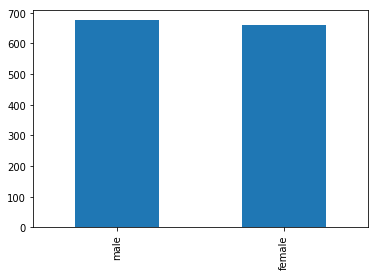

In [39]:
df['sex'].value_counts().plot('bar')

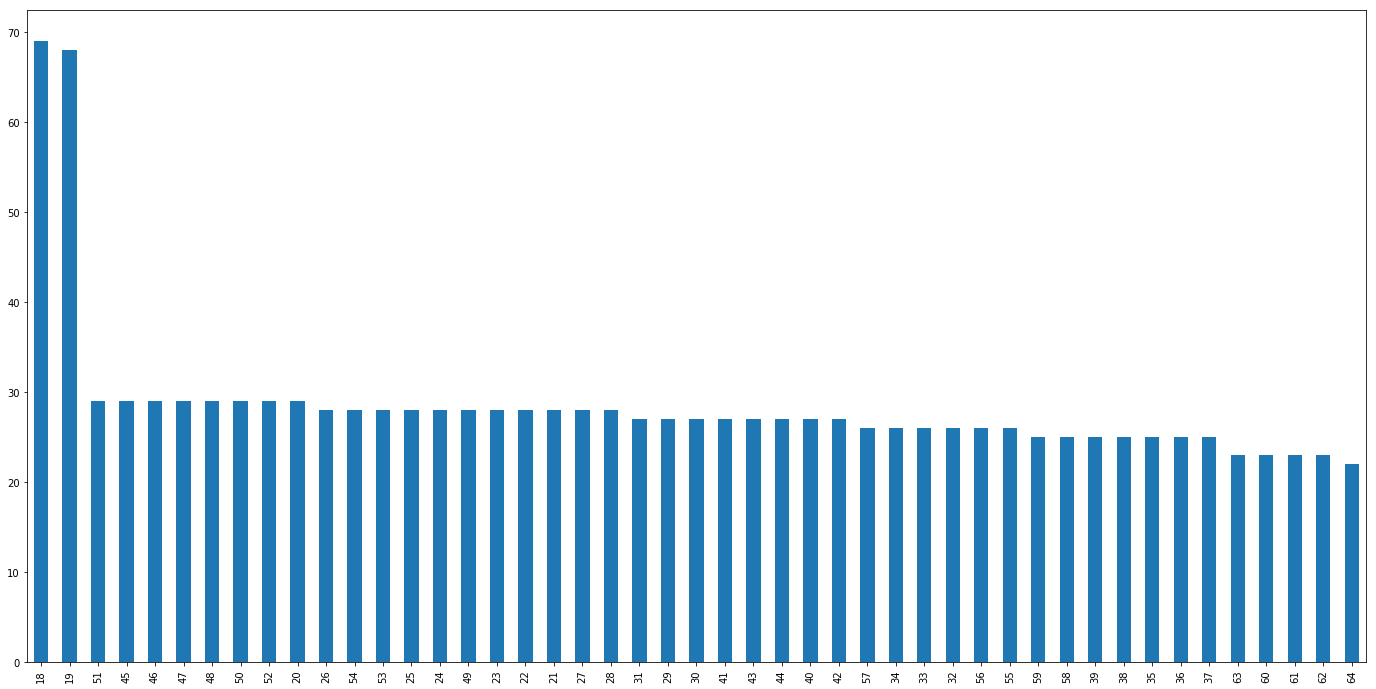

In [40]:
plt.figure(figsize = (24,12))
df['age'].value_counts().plot('bar')

In [41]:
### as wee see highest num of people belong under age 30 , and a spike at 18,19 whihc is quite obvious

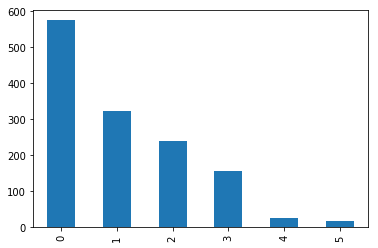

In [42]:
df['children'].value_counts().plot('bar')

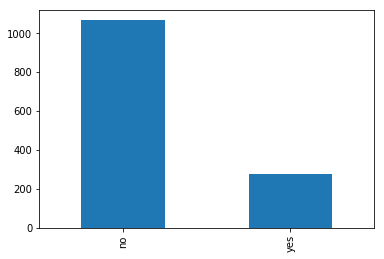

In [43]:
df['smoker'].value_counts().plot('bar')

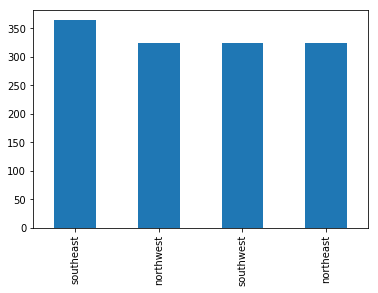

In [44]:
df['region'].value_counts().plot('bar')

Text(0.5, 1.0, 'AGE VS CHARGES')

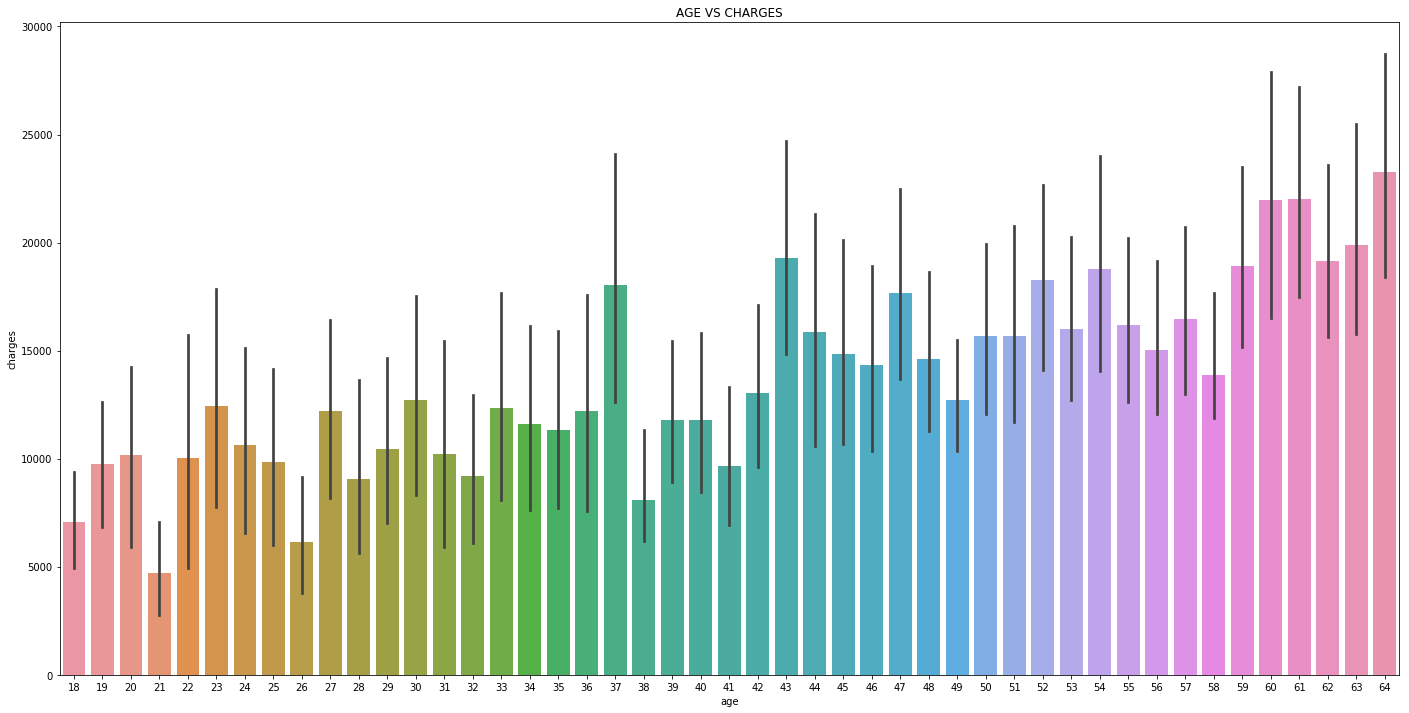

In [45]:
### lets look at age vs charges , as age is high the insurance charges would be high
plt.figure(figsize = (24,12))
sns.barplot(x = 'age', y = 'charges', data= df)
plt.title('AGE VS CHARGES')



In [46]:
### from fig it is evident that as age increases the charges increase for insurance

Text(0.5, 1.0, 'SEX VS CHARGES')

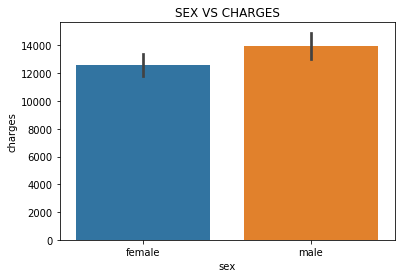

In [47]:
#### lets look at sex vs charges
sns.barplot(x = 'sex', y = 'charges', data= df)
plt.title('SEX VS CHARGES')


In [48]:
### not a huge difference in sex ratio who pay for insuarnce

Text(0.5, 1.0, 'CHILDREN VS CHARGES')

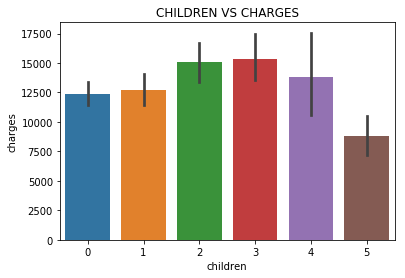

In [49]:
#### num of children vs charges 
sns.barplot(x = 'children', y = 'charges', data= df)
plt.title('CHILDREN VS CHARGES')


In [50]:
### interesting to see people with 2-3 children who pay insurance are more compared to others 

Text(0.5, 1.0, 'SMOKER VS CHARGES')

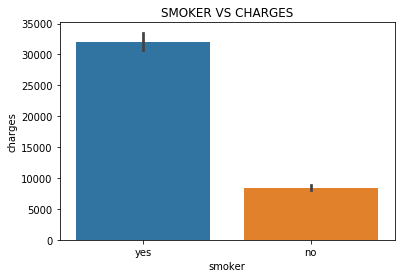

In [51]:
### smoker vs charges
sns.barplot(x = 'smoker', y = 'charges', data= df)
plt.title('SMOKER VS CHARGES')


In [52]:
### yessss , this is quite natural people who smoke have to pay more charges for insurance,
### which is a important feature to predict 

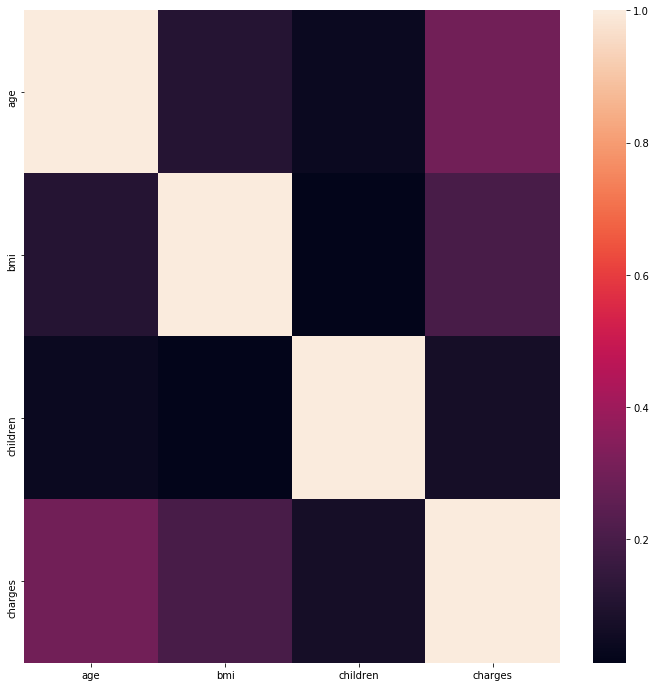

In [53]:
### lets see how each feature is correlated to others
f, ax = plt.subplots(figsize = (12, 12))
cor = df.corr()
sns.heatmap(cor)



In [54]:
### from heatap it is clear that num of children doesnt have any impact on charges paid

In [55]:
### select only required columns as region and num of children doesnt make any impact on charges lets remove them
df = df.drop('region' ,axis = 1)

df.head(5)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [56]:
### convert text data into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [58]:
### choose x and y features to build model
x = df.iloc[:,:5]
y = df.iloc[:,5]
print(x.head(), '\n')
print(y.head())

   age  sex     bmi  children  smoker
0   19    0  27.900         0       1
1   18    1  33.770         1       0
2   28    1  33.000         3       0
3   33    1  22.705         0       0
4   32    1  28.880         0       0 

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [59]:
### split data into test and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42, )


In [65]:
### scale the train features
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

print(x_train[:5], '\n')
print(x_train[:5])


[[ 1.54446486 -1.02597835  0.10318223 -0.91501097 -0.51298918]
 [ 0.48187425  0.97467943 -0.4908445  -0.91501097 -0.51298918]
 [ 1.04858924 -1.02597835  0.2266597   1.56027883 -0.51298918]
 [ 1.11942861  0.97467943  0.02392305 -0.91501097  1.94935887]
 [-1.00575261  0.97467943  2.50264978  0.73518223  1.94935887]] 

[[ 1.54446486 -1.02597835  0.10318223 -0.91501097 -0.51298918]
 [ 0.48187425  0.97467943 -0.4908445  -0.91501097 -0.51298918]
 [ 1.04858924 -1.02597835  0.2266597   1.56027883 -0.51298918]
 [ 1.11942861  0.97467943  0.02392305 -0.91501097  1.94935887]
 [-1.00575261  0.97467943  2.50264978  0.73518223  1.94935887]]


In [67]:
### linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = np.mean((y_test-y_pred)**2, axis =None)
r_2 = r2_score(y_test, y_pred)

print(y_pred[:10], '\n')
print('MSE :{}'.format(mse) , '\n' , 'R sq score : {}'.format(r_2))



[ 8695.35853424  6947.19262705 37555.60539071  9719.50676843
 27293.88044873 11063.37828456    45.19245479 17036.85645701
   791.49551366 11449.79849955] 

MSE :34019219.38251682 
 R sq score : 0.767983768372968


# r_2 score is close to 0.8 which is good

In [68]:
### support vector regressor 

from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = np.mean((y_test-y_pred)**2, axis =None)
r_2 = r2_score(y_test, y_pred)

print(y_pred[:10], '\n')
print('MSE :{}'.format(mse) , '\n' , 'R sq score : {}'.format(r_2))


[9499.7168325  9453.27157798 9589.98305907 9506.62776088 9568.32902996
 9494.09672451 9447.64237393 9579.13335493 9476.77306059 9517.9780563 ] 

MSE :157940141.84545425 
 R sq score : -0.07717570240467242


# really bad r_2 value which is worse than mean model

In [69]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = np.mean((y_test-y_pred)**2, axis =None)
r_2 = r2_score(y_test, y_pred)

print(y_pred[:10], '\n')
print('MSE :{}'.format(mse) , '\n' , 'R sq score : {}'.format(r_2))


[ 8583.18634   4966.2178   28235.610885 10865.739222 34067.142325
  7431.309581  1637.147455 14181.876615  5386.154229 10307.71374 ] 

MSE :24517013.985484228 
 R sq score : 0.8327902491912366


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# r_2 score  better than linear model , advantage of ensemble learning
